In [134]:
import numpy as np
import matplotlib.pyplot as plt



def load_dataset(path):
    """From path load data into a ndarray of x matrix and an array of labels.
    
    Args:
        path: the path to the txt file
    Returns:
        dataset: ndarray containing feature vectors
        labels: array containing labels
    """
    # Load one row to get size 
    with open(path, 'r') as fr:
        first_row = fr.readline().strip().split('\t')
        
    x_cols = [i for i in range(len(first_row) - 1)]
    l_col = [len(first_row) - 1]
    
    dataset = np.loadtxt(path, delimiter='\t', usecols=x_cols)
    dataset_w_x0 = add_intercept(dataset)
    labels = np.loadtxt(path, delimiter='\t', usecols=l_col)
    return dataset_w_x0, labels

def add_intercept(x):
    """
    Add intercept to matrix x.

    Args: 
        x: two dimensional numpy array.
    Returns:
        New matrix same as input x with 1's in the 0th column.
    """
    m, n = x.shape
    new_x = np.zeros((m, n + 1), dtype=x.dtype)
    new_x[:, 0] = 1
    new_x[:, 1:] = x
    return new_x

def sigmoid(x):
    """Return the sigmoid function result given x."""
    if x >= 0:
        return 1 / (1 + np.exp(-x))
    else:
        return np.exp(x) / (1 + np.exp(x)) # to avoid overflow

def batch_gradient_ascent(dataset, labels, alpha=0.001, eps=1e-5):
    """Using batch gradient ascent to solve for MLE.
    
    Args:
        dataset: ndarray containing feature vectors, dataset contains x0 = 1
        labels: array containing labels
        alpha: tuning parameter 
        eps: error parameter
    Returns:
        theta: the parameter of logistic regression. Shape (m, )
    """
    m, n = dataset.shape
    theta = np.zeros(n)
#     cycle = 0

    while True:
        theta_prev = np.copy(theta)

        h = sigmoid(dataset.dot(theta))
        deriv_log_l = dataset.T.dot(labels - h)
        theta = theta_prev + alpha * deriv_log_l
        
#         cycle += 1

        if np.linalg.norm(theta - theta_prev, ord = 1) < eps:
            break
    
    return theta

def stochastic_gradient_ascent(dataset, labels, alpha=0.001, eps=1e-5):
    """Using stochastic gradient ascent to solve for MLE.
    
    Args:
        dataset: ndarray containing feature vectors, dataset contains x0 = 1
        labels: array containing labels
        alpha: tuning parameter 
        eps: error parameter
    Returns:
        theta: the parameter of logistic regression. Shape (m, )
    """
    m, n = dataset.shape
    theta = np.zeros(n)
#     cycle = 0

    while True:

        for i in range(m):
            theta_prev = np.copy(theta)

            h_i = sigmoid(dataset[i].dot(theta))
            deriv_log_l_i = dataset[i].dot(labels[i] - h_i)
            theta += alpha * deriv_log_l_i
#             cycle += 1

        if np.linalg.norm(theta - theta_prev, ord=1) < eps:
            break

    return theta

def stochastic_gradient_ascent_modified(dataset, labels, max_cycle=150):
    """Using stochastic gradient ascent to solve for MLE with gradually changing alpha parameter.
    
    Args:
        dataset: ndarray containing feature vectors, dataset contains x0 = 1
        labels: array containing labels
        max_cycle: maximum cycle for iteratively solving for theta
    Returns:
        theta: the parameter of logistic regression. Shape (m, )
    """
    m, n = dataset.shape
    theta = np.zeros(n)

    for j in range(max_cycle):
        index_list = list(range(m))

        for i in range(m):
            alpha = 4.0 / (1.0 + i + j) + 0.01
            ind = int(np.random.uniform(0, len(index_list)))

            h_ind = sigmoid(dataset[ind].dot(theta))
            deriv_log_l_ind = dataset[ind].dot(labels[ind] - h_ind)
            theta += alpha * deriv_log_l_ind

            del index_list[ind]

    return theta

def plot_model(file_path, save_path, theta):
    """
    Plot dataset and fitted logistic regression parameters.

    Args:
        path: path to the txt file with dataset and labels.
        theta: Vector of parameters for logistic regression.
    """
    # Plot dataset
    x, y = load_dataset(file_path)
    fig, ax = plt.subplots()
    ax.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    ax.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving theta^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2])) * 0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1])) * 0.2
    x1 = np.arange(min(x[:, -2]) - margin1, max(x[:, -2]) + margin1, 0.01)
    x2 = -(theta[0] + theta[1]*x1) / theta[2]
    ax.plot(x1, x2, c = 'red', linewidth=2)

    # Plot limits and labels
    ax.set_xlim(min(x[:, -2]) - margin1, max(x[:, -2]) + margin1)
    ax.set_ylim(min(x[:, -1]) - margin2, max(x[:, -1]) + margin2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    plt.savefig(save_path)
    plt.show()

In [125]:
dataset, labels = load_dataset('testSet.txt')
dataset

array([[ 1.0000000e+00, -1.7612000e-02,  1.4053064e+01],
       [ 1.0000000e+00, -1.3956340e+00,  4.6625410e+00],
       [ 1.0000000e+00, -7.5215700e-01,  6.5386200e+00],
       [ 1.0000000e+00, -1.3223710e+00,  7.1528530e+00],
       [ 1.0000000e+00,  4.2336300e-01,  1.1054677e+01],
       [ 1.0000000e+00,  4.0670400e-01,  7.0673350e+00],
       [ 1.0000000e+00,  6.6739400e-01,  1.2741452e+01],
       [ 1.0000000e+00, -2.4601500e+00,  6.8668050e+00],
       [ 1.0000000e+00,  5.6941100e-01,  9.5487550e+00],
       [ 1.0000000e+00, -2.6632000e-02,  1.0427743e+01],
       [ 1.0000000e+00,  8.5043300e-01,  6.9203340e+00],
       [ 1.0000000e+00,  1.3471830e+00,  1.3175500e+01],
       [ 1.0000000e+00,  1.1768130e+00,  3.1670200e+00],
       [ 1.0000000e+00, -1.7818710e+00,  9.0979530e+00],
       [ 1.0000000e+00, -5.6660600e-01,  5.7490030e+00],
       [ 1.0000000e+00,  9.3163500e-01,  1.5895050e+00],
       [ 1.0000000e+00, -2.4205000e-02,  6.1518230e+00],
       [ 1.0000000e+00, -3.6453

In [74]:
theta = batch_gradient_ascent(dataset, labels)
theta

array([14.59046459,  1.24261711, -1.98108588])

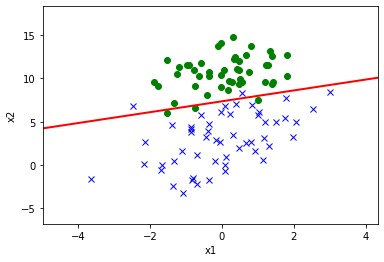

In [75]:
plot_model('testSet.txt', 'log_reg_1.png', theta)

In [83]:
theta1 = stochastic_gradient_ascent(dataset, labels)

In [84]:
theta1

array([ 7.0362144 ,  0.70333958, -0.9933474 ])

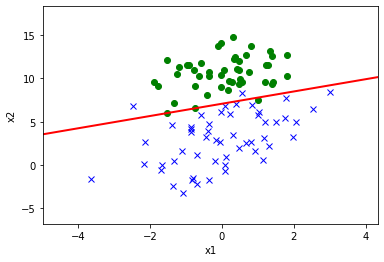

In [85]:
plot_model('testSet.txt', 'log_reg_2.png', theta1)

In [93]:
theta2 = stochastic_gradient_ascent_modified(dataset, labels)
theta2

array([13.38749229,  0.84764874, -1.99838197])

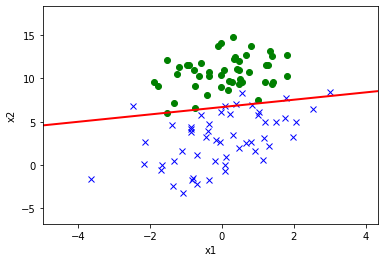

In [94]:
plot_model('testSet.txt', 'log_reg_3.png', theta2)

In [97]:
def classify_x(x, theta):
    """Classify if a new example x using logistic regression.
    
    Args:
        x: array as the new example. Shape (n,)
        theta: logistic regression model parameters of training set
    Return:
        1 for postive. 0 for negative
    """
    h = sigmoid(x.dot(theta))
    if h > 0.5: 
        return 1
    else:
        return 0

def colic_test(train_path, test_path):
    """Build logistic regression on training set and use it on the test set.
    
    Args:
        train_path: path to the txt file containing training dataset
        test_path: path to the txt file containing test dataset
    Return:
        err_rate: the error rate of classifying test dataset
    """
    # Load dataset
    x_train, y_train = load_dataset(train_path)
    x_test, y_test = load_dataset(test_path)

    # Build model using stochastic gradient ascent
    theta = stochastic_gradient_ascent_modified(x_train, y_train, 500)

    # Calculate error rate 
    err_cnt = 0
    for i in range(x_test.shape[0]):
        if classify_x(x_test[i], theta) != y_test[i]:
            err_cnt += 1

    err_rate = float(err_cnt) / x_test.shape[0]
    print("The error rate of this test is: {}".format(err_rate))
    return err_rate

def multi_tests(num, train_path, test_path):
    """Perform colic test multiple times and get an average error rate.
    
    Args:
        num: number of tests to run
        train_path: path to the txt file containing training dataset
        test_path: path to the txt file containing test dataset
    Returns:
        ave_err_rate: the average test error rate
    """
    err_sum = 0

    for i in range(num):
        err_rate = colic_test(train_path, test_path)
        err_sum += err_rate
    
    ave_err_rate = err_sum / float(num)
    print("The average test error rate over {0} tests is: {1}".format(num, ave_err_rate))

In [135]:
colic_test('horseColicTraining.txt', 'horseColicTest.txt')

The error rate of this test is: 0.3283582089552239


0.3283582089552239

In [136]:
multi_tests(10, 'horseColicTraining.txt', 'horseColicTest.txt')

The error rate of this test is: 0.373134328358209
The error rate of this test is: 0.417910447761194
The error rate of this test is: 0.34328358208955223
The error rate of this test is: 0.373134328358209
The error rate of this test is: 0.3880597014925373
The error rate of this test is: 0.26865671641791045
The error rate of this test is: 0.3582089552238806
The error rate of this test is: 0.31343283582089554
The error rate of this test is: 0.34328358208955223
The error rate of this test is: 0.2835820895522388
The average test error rate over 10 tests is: 0.346268656716418


In [126]:
x_train, y_train = load_dataset('horseColicTraining.txt')

In [127]:
x_train

array([[ 1. ,  2. ,  1. , ...,  8.4,  0. ,  0. ],
       [ 1. ,  1. ,  1. , ..., 85. ,  2. ,  2. ],
       [ 1. ,  2. ,  1. , ...,  6.7,  0. ,  0. ],
       ...,
       [ 1. ,  1. ,  1. , ...,  6.8,  0. ,  0. ],
       [ 1. ,  1. ,  1. , ...,  6. ,  3. ,  3.4],
       [ 1. ,  1. ,  1. , ..., 62. ,  1. ,  1. ]])

In [128]:
y_train

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0.

In [129]:
x_train.shape

(299, 22)

In [131]:
y_train.shape

(299,)